# ME4429 Assignment 1 - Solar panels and summer nights

Peter Murray</br>
Professor Levey</br>
ME4429 Thermofluid Application and Design</br>
9/1/2022

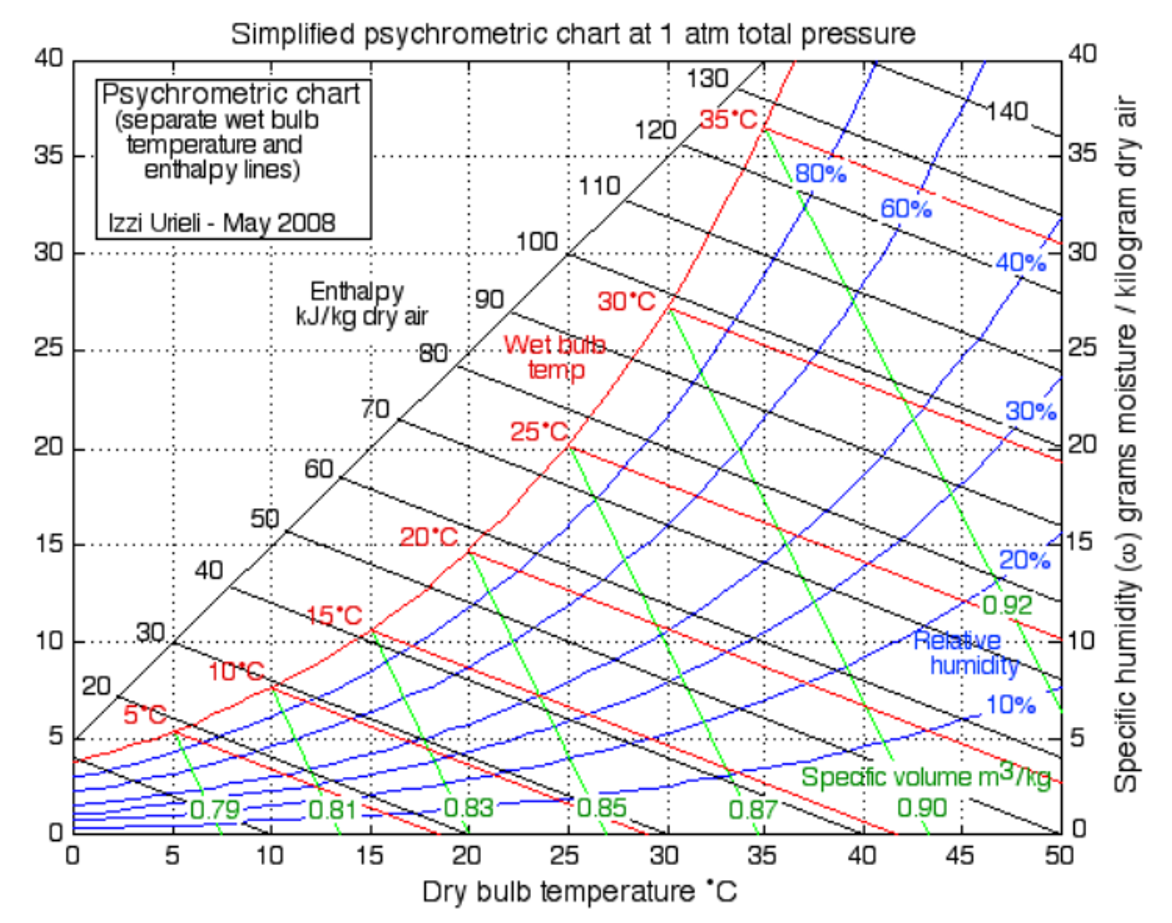

Environmental properties (from given values & psychrometric chart):

In [2]:
Td_out = 35.0 # deg C, dry bulb temp
Tw_out = 30.0 # deg C, wet bulb temp
sV_out = 0.91 # m3/kg, specific volume
hum_out = 0.74 # relative humidity
w_out = 25.0 # g/kg dry air, specific humidity
h_out = 98.0 # kJ/kg dry air, specific enthalpy 

Td_in = 23.9 
Tw_in = 14.0
sV_in = 0.85
hum_in = 0.3 
w_in = 9.0 
h_in = 38.0 

Given Building Properties:

In [3]:
floorspace = 1750 # ft3
height_house = 9 # ft, average height (room) house
v_house_ft3 = floorspace * height_house # ft3, volume
v_house = v_house_ft3 / 35.315 # m3, volume
airchanges_hr = 1.5 # (how many times the air in the house is refreshed)/hr

# solve for mass of dry air at house temp
p = 101325 # pascal, pressure
R = 287.05 # ideal gas constant
Td_in_k = Td_in + 273 # k, temp
density_dryair = p / (R * Td_in_k) # kg/m3
m_dryair = density_dryair * v_house # kg

# House air is dry air + water. Add the masses to find total mass.
m_air = m_dryair + (m_dryair * (w_in / 1000))

# solve for mass flow rate
mdot_hr = m_air * airchanges_hr # kg/hr
mdot_sec = mdot_hr / (60*60) # kg/s
print(f"Mass flow rate: {round(mdot_sec,3)} kg/s")

# solve for volumetric flow rate
vdot_hr = v_house * airchanges_hr # m3/hr
vdot_s = vdot_hr / (60*60) # m3/s
print(f"Volumetric flow rate: {round(vdot_s,3)} m3/s")

# check if 0.7-1.1 cfm/sqft matches recommended values
# solve for volumetric flow rate in imperial
vdot_hr_i = v_house_ft3 * airchanges_hr # ft3/hr
vdot_min_i = vdot_hr_i / 60 # ft3/min
airflow = vdot_min_i / floorspace
print(f"Airflow: {round(airflow,3)} cfm/sqft")

Mass flow rate: 0.223 kg/s
Volumetric flow rate: 0.186 m3/s
Airflow: 0.225 cfm/sqft


The calculated airflow (0.225 cfm/sqft) is below the recommended values (between 0.7 - 1.1), but the airflow can easily be changed by increasing our ceiling height. For a  room height of 9 ft, the amount of 'air changes an hour' is fairly low.

## Part 1a

In [4]:
print(f"Mass flow rate: {round(mdot_sec,3)}, kg/s")
print(f"Dry bulb temp: {Td_in} deg C")
print(f"Wet bulb temp: {Tw_in} dec C")
print(f"Relative humidity: {hum_in}")
print(f"Specific enthalpy: {h_in} kJ/kg")

Mass flow rate: 0.223, kg/s
Dry bulb temp: 23.9 deg C
Wet bulb temp: 14.0 dec C
Relative humidity: 0.3
Specific enthalpy: 38.0 kJ/kg


>* Mass flow rate: 0.223, kg/s
>* Dry bulb temp: 23.9 deg C
>* Wet bulb temp: 14.0 dec C
>* Relative humidity: 0.3
>* Specific enthalpy: 38.0 kJ/kg

In [5]:
# referencing diagram for states
mdot_exaust = 0.1

# 1 (from house) (same as inside)
Td_1 = Td_in
Tw_1 = Tw_in
sV_1 = sV_in
hum_1 = hum_in
w_1 = w_in
h_1 = h_in
mdot_1 = mdot_sec # kg/s, mass flow rate (from above calulation)
print("\n\t== State 1 == ")
for elem in zip([Td_1, Tw_1, sV_1, hum_1, w_1, h_1],["Dry bulb temp (C):", "Wet bulb temp (C):", "Specific vol (m3/kg):","Humidity:","Specific Humidity (g H20/kg dry air):","Specific Enthalpy (kJ/kg):"]):
    print(f"{elem[1]} {elem[0]}")

# 2 (exaust) same as 1, except:
mdot_2 = mdot_exaust

# 3 (b4 intake) same as 1, except:
mdot_3 = mdot_1 - mdot_2
h_3 = h_1
Td_3 = Td_1

# 4 (intake) (same as outside)
Td_4 = Td_out
Tw_4 = Tw_out
sV_4 = sV_out
hum_4 = hum_out
w_4 = w_out
h_4 = h_out
mdot_4 = 0.1 # kg/s, mass flow rate
print("\n\t== State 4 == ")
for elem in zip([Td_4, Tw_4, sV_4, hum_4, w_4, h_4],["Dry bulb temp (C):", "Wet bulb temp (C):", "Specific vol (m3/kg):","Humidity:","Specific Humidity (g H20/kg dry air):","Specific Enthalpy (kJ/kg):"]):
    print(f"{elem[1]} {elem[0]}")

# 5 (b4 coils) here we combine (or mix) the two incoming sources with an energy balance
mdot_5 = mdot_4 + mdot_3
h_5 = (((mdot_3) / (mdot_5)) * h_3) + (((mdot_4) / (mdot_5)) * h_4)

# for temp, take temp fraction from each inlet
Td_5 = ((mdot_3 / mdot_5) * Td_3) + ((mdot_4 / mdot_5) * Td_4)
print(f"\nmdot_5: {round(mdot_5,3)} kg/s\nh_5: {round(h_5,3)} kJ/kg\nTd_5: {round(Td_5,3)} C\n")

# 6 (into house), from phychromatic chart, moving RH to 100 as coils cool air
hum_6 = 1
h_6 = 19.0 # kJ/kg dry air, specific enthalpy 
w_6 = 6 # g/kg dry air, specific humidity



	== State 1 == 
Dry bulb temp (C): 23.9
Wet bulb temp (C): 14.0
Specific vol (m3/kg): 0.85
Humidity: 0.3
Specific Humidity (g H20/kg dry air): 9.0
Specific Enthalpy (kJ/kg): 38.0

	== State 4 == 
Dry bulb temp (C): 35.0
Wet bulb temp (C): 30.0
Specific vol (m3/kg): 0.91
Humidity: 0.74
Specific Humidity (g H20/kg dry air): 25.0
Specific Enthalpy (kJ/kg): 98.0

mdot_5: 0.223 kg/s
h_5: 64.915 kJ/kg
Td_5: 28.879 C



## Part 1b

In [6]:
# Heat in
solar_heat_gain = 24000 # watts, power
people_and_appliances = 900 # watts, power
Q_in = solar_heat_gain + people_and_appliances

Q_c = mdot_5 * (h_5 - h_6)
Q_h = mdot_1 * (h_1 - h_6)
#Q_envelope = ( - Q_in)

Q_c_btuhr = Q_c * 3412.14245
Q_c_tonsref = Q_c / 3.517

print(f"Cooling Capacity: {round(Q_c, 3)} kW, {round(Q_c_btuhr)} BTU/hr, or {round(Q_c_tonsref,3)} tons of refrigeration.")

Cooling Capacity: 10.235 kW, 34925 BTU/hr, or 2.91 tons of refrigeration.


> Cooling Capacity: 10.235 kW, 34,925 BTU/hr, or 2.91 tons of refrigeration.

## Part 1c

Given a realistic change in enthalpy from 40 -> 240 kJ/kg (see attached PV diagram for R134a below), we can calculate the mass flow rate of the refrigerant within the heat exchanger.

In [12]:
h_refrigerant_0 = 40 # kJ/kg, enthalpy
h_refrigerant_1 = 240 #kJ/kg, enthalpy
h_refrigerant_2 = 300 #kJ/kg, enthalpy

mdot_refrigerant = (mdot_5 * (h_5 - h_6)) / (h_refrigerant_1 - h_refrigerant_0)
print(f"Mass flow rate of refrigerant (r134a): {round(mdot_refrigerant,3)} kg/s")

Mass flow rate of refrigerant (r134a): 0.051 kg/s


> The mass flow rate of the refrigerant (R134a) is $0.051 \frac{kg}{s}$.

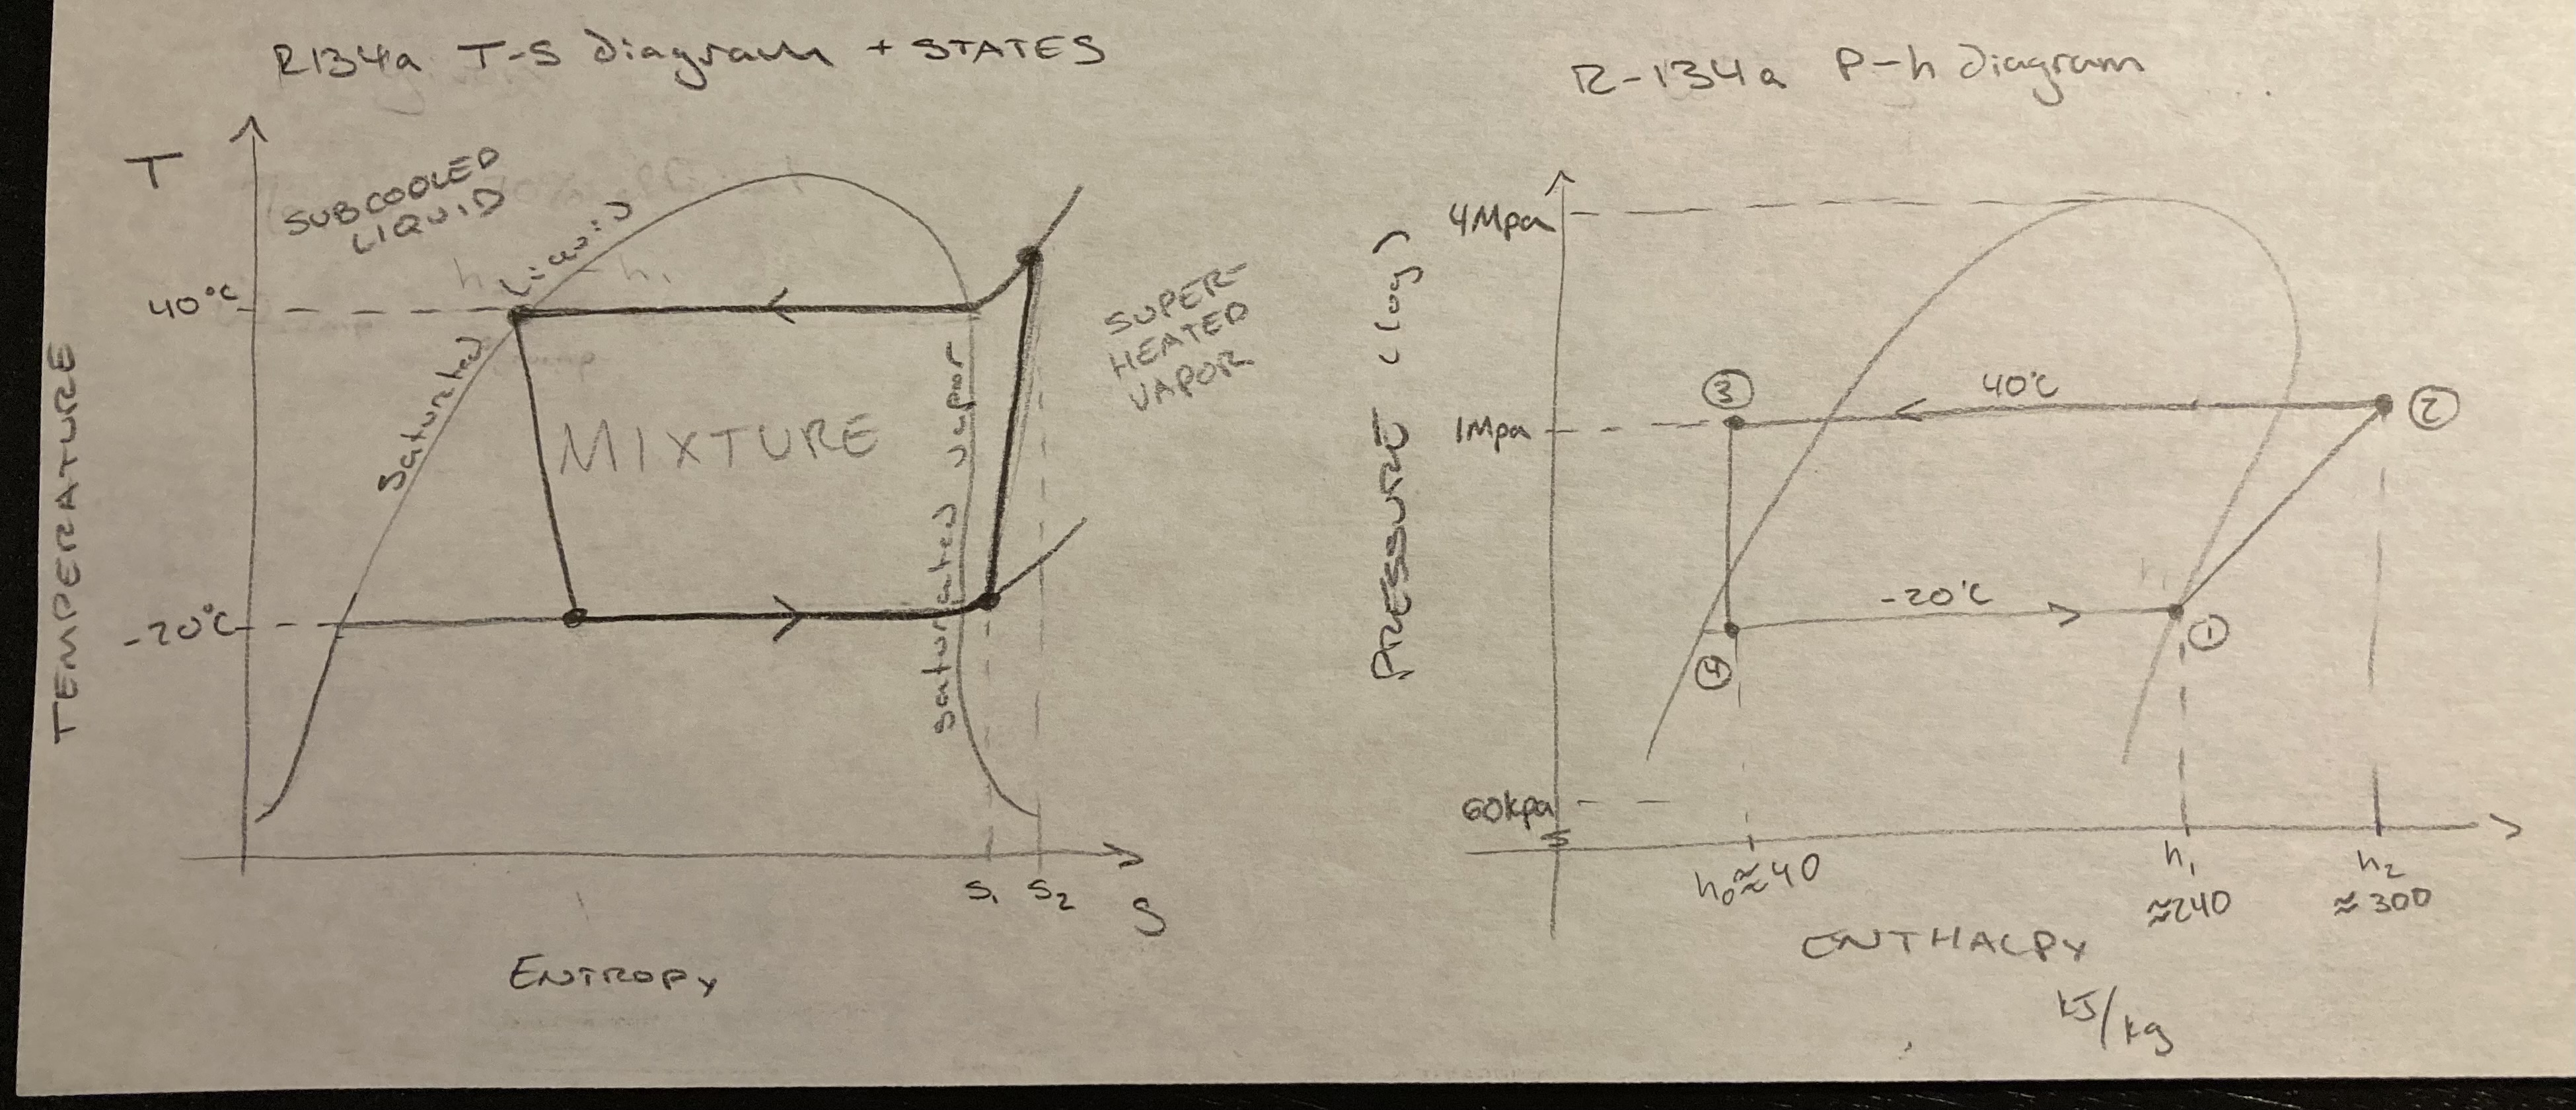

## Part 1d

The coefficient of performance (COP) is  $COP = \frac{Q_{cold}}{W} $

Where $W = Q_{hot} + Q_{cold} $

In [15]:
cop = Q_c / (Q_h + Q_c)
print(f"Coefficient of performance: {round(cop,3)}")

Coefficient of performance: 0.707


> The coefficient of performance (COP) is 70.7%

## Part 2a

> According to http://www.solarelectricityhandbook.com/solar-irradiance.html, for Shrewsbury, MA, The best panel angle in the summer is 63 degrees.

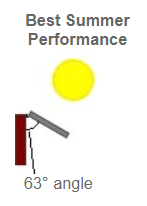

## Part 2b

>According to http://www.solarelectricityhandbook.com/solar-irradiance.html, for Shrewsbury, MA, the average solar insolation per day on a horizontal surface in July is $5.61 \frac{kWh}{m^2}$ per day.

## Part 2c

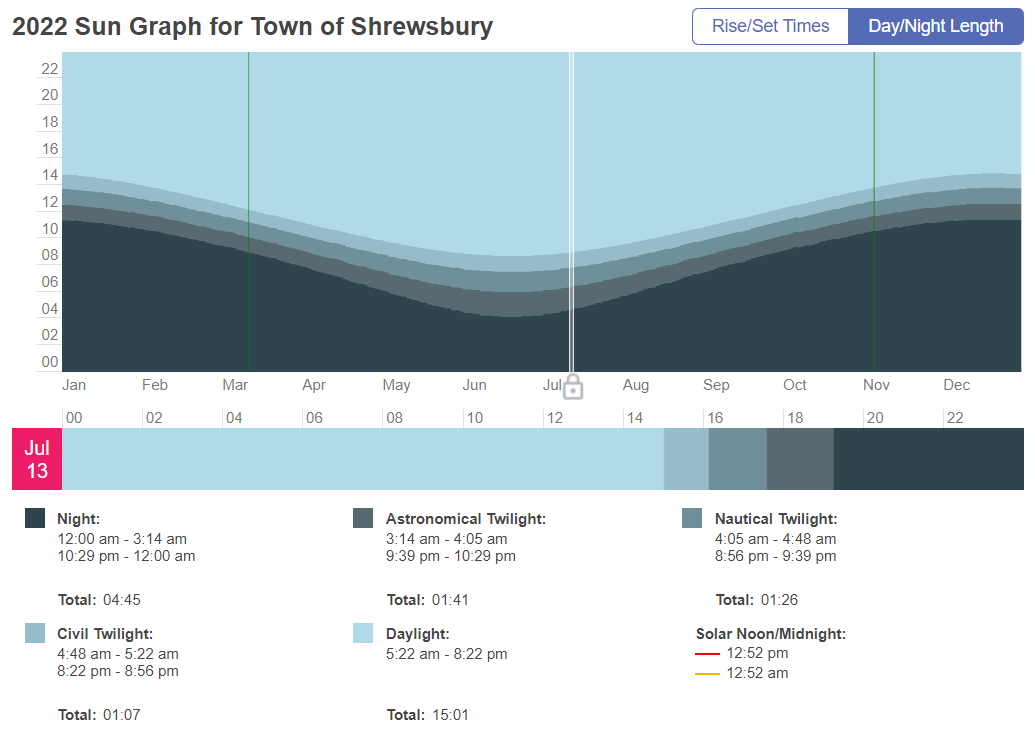

source: https://www.timeanddate.com/sun/@4950909

In [27]:
# given power loads
avg_day_load = .85 # fraction of peak power
avg_night_load = .3 # fraction of peak power
day_length = 15 # hour, time
night_length = 9 # hour, time

Assuming a 15 hour 'day' and a 9 hour 'night' for Shewsbury, MA, we can calculate the total power draw for a full 24 hour cycle.

In [31]:
peak_power = Q_h + Q_c
total_energy = (day_length * avg_day_load * peak_power) + (night_length * avg_night_load * peak_power)

print(f"Peak power draw: {round(Q_c,3)} kW per hour\nTotal energy needed per day: {round(total_energy,3)} kWh")



Peak power draw: 10.235 kW per hour
Total energy needed per day: 223.577 kWh


>We would require $223.6$ kWh per day.

## Part 2d

We need to collect 223.6 kWh during the daylight hours, of which we have 15.

$\frac{223.6 kW}{24 hr} = \frac{x}{15 hr}$

In [34]:
required_power = (total_energy * day_length) / 24
print(f"Power required: {round(required_power,3)} kW")

Power required: 139.735 kW


> We need to collect an average of $139.7$ kW during the daylight hours.

## Part 2e

In [41]:
avg_solar_insolation = 5.61 # kWh/m2, power over area, from part 2b
PV_efficiency = .115 # fraction

PV_energy = avg_solar_insolation * PV_efficiency



PV_area = total_energy / PV_energy

print(f"Our solar panels, at an efficiency of {PV_efficiency}, can produce {round(PV_energy,3)} kWh/m2")
print(f"We would require {round(PV_area,3)} m2 of PV panels")

Our solar panels, at an efficiency of 0.115, can produce 0.645 kWh/m2
We would require 346.55 m2 of PV panels


> It would require $346.55 m^2$ of PV panels to satisfy the energy demand.

## Part 2f

In [52]:
PV_power = 240 # Watts per 1kW/m2 of irradiance

# we have 5.61kWh/m2 per day = 5.61kW/m2 every hour

PV_power_per_panel = avg_solar_insolation * PV_power
panels_required = required_power / (PV_power_per_panel/1000)

print(f"exact # of panels: {round(panels_required,3)}")
print(f"We would require {round(panels_required)} panels, if our panels give {PV_power_per_panel} W per panel.")


exact # of panels: 103.784
We would require 104 panels, if our panels give 1346.4 W per panel.


> It would require 104 panels to satisfy the power demand.

## Part 2g

In [58]:
PV_rate = 2.87 # $/watt

PV_cost = (required_power*1000) * PV_rate

print(f"It would require ${round(PV_cost,2)} at a rate of ${PV_rate} per Watt.")

It would require $401040.64 at a rate of $2.87 per Watt.


> It would require an upfront cost of $401,000.

## Part 2h

In [65]:
grid_rate = 0.2385 # $/kWh

grid_cost = grid_rate * required_power

print(f"exact cost: {round(grid_cost,3)}")
print(f"It would cost ${round(grid_cost,2)} a day.")

exact cost: 33.327
It would cost $33.33 a day.


> It would cost $33.33 a day.

## Part 3

$kWh = \frac{Ah*V}{1000}$

In [140]:
import numpy as np
import math
import pprint

# energy required for the night, at .3 peak power for 8 hours:
night_energy = (night_length * avg_night_load * peak_power)
night_power = (avg_night_load * peak_power)
print(f"night_power: {round(night_power,3)} kW")
print(f"night_energy: {round(night_energy,3)} kWh")

batt_choices = {
    1 : {
        "voltage": 12,
        "AH": 150,
        "cost": 500
    },
    2 : {
        "voltage": 12,
        "AH": 200,
        "cost": 660
    },
    3 : {
        "voltage": 24,
        "AH": 100,
        "cost": 700
    },
    4 : {
        "voltage": 24,
        "AH": 200,
        "cost": 1470
    },
    5 : {
        "voltage": 48,
        "AH": 100,
        "cost": 1590
    },
    6 : {
        "voltage": 48,
        "AH": 200,
        "cost": 3000
    }
}

# calculate energy capacity for each battery
for choice in batt_choices:
    batt_choices[choice]["kWh"] = (batt_choices[choice]["AH"] * batt_choices[choice]["voltage"]) / 1000

# calculate $/capacity
#for choice in batt_choices:
#    batt_choices[choice]["costperenergy"] = batt_choices[choice]["cost"] / batt_choices[choice]["capacity"] 


# to meet energy demand, put batteries in series
for choice in batt_choices:
    batt_choices[choice]['# batteries required'] = math.ceil(night_energy / batt_choices[choice]['kWh'])

for choice in batt_choices:
    batt_choices[choice]['TOTAL COST'] = batt_choices[choice]['# batteries required'] * batt_choices[choice]["cost"]

pprint.pprint(batt_choices)

list_of_costs = [batt_choices[choice]['TOTAL COST'] for choice in batt_choices]

index_min = np.argmin(list_of_costs) + 1 # cheapest!
avg_price = np.mean(list_of_costs)

print(f"The best choice would be battery # {index_min}, as it costs ${round(batt_choices[index_min]['TOTAL COST'],3)} for {batt_choices[index_min]['# batteries required']} batteries in series.")

print(f"This battery is ${round(avg_price - (list_of_costs[index_min]),2)} less than the average price of the other battery combinations (${round(avg_price,2)}) (to achieve {round(night_energy,3)} kWh)")


night_power: 4.341 kW
night_energy: 39.072 kWh
{1: {'# batteries required': 22,
     'AH': 150,
     'TOTAL COST': 11000,
     'cost': 500,
     'kWh': 1.8,
     'voltage': 12},
 2: {'# batteries required': 17,
     'AH': 200,
     'TOTAL COST': 11220,
     'cost': 660,
     'kWh': 2.4,
     'voltage': 12},
 3: {'# batteries required': 17,
     'AH': 100,
     'TOTAL COST': 11900,
     'cost': 700,
     'kWh': 2.4,
     'voltage': 24},
 4: {'# batteries required': 9,
     'AH': 200,
     'TOTAL COST': 13230,
     'cost': 1470,
     'kWh': 4.8,
     'voltage': 24},
 5: {'# batteries required': 9,
     'AH': 100,
     'TOTAL COST': 14310,
     'cost': 1590,
     'kWh': 4.8,
     'voltage': 48},
 6: {'# batteries required': 5,
     'AH': 200,
     'TOTAL COST': 15000,
     'cost': 3000,
     'kWh': 9.6,
     'voltage': 48}}
The best choice would be battery # 1, as it costs $11000 for 22 batteries in series.
This battery is $1556.67 less than the average price of the other battery combinat

> The best choice would be battery # 1, as it costs \\$11,000 for 22 batteries in series.
This battery is \\$1,556.67 less than the average price of the other battery combinations (\\$12,776.67), all to achieve 39.072 kWh.